<a href="https://colab.research.google.com/github/DhushyanthRavichandran/AI/blob/main/DL/RNN_using_TensorFlow_Keras_spam_classifierdataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
data=pd.read_csv("https://raw.githubusercontent.com/soaicbe/ml/master/spam.csv")
data

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:

data['Category'] = data['Category'].map({'spam': True, 'ham': False}).astype('int8')


In [ ]:
# data['Message']=data['Message'].tolist()
# data['Message']

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data.Message , data.Category , test_size=0.2, random_state=42)


In [ ]:
X_train=X_train.tolist()
X_test=X_test.tolist()
y_train= y_train.tolist()
y_test=y_test.tolist()

In [ ]:
# y_train

## 3. Building the Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import Input

model = Sequential()
model.add(Input(shape=(1,), dtype="string"))

### 3.1 Text Vectorization

In [ ]:
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

max_tokens = 500
max_len = 5
vectorize_layer = TextVectorization(
  # Max vocab size. Any words outside of the max_tokens most common ones
  # will be treated the same way: as "out of vocabulary" (OOV) tokens.
  max_tokens=max_tokens,
  # Output integer indices, one per string token
  output_mode="int",
  # Always pad or truncate to exactly this many tokens
  output_sequence_length=max_len,
)

In [ ]:
# Call adapt(), which fits the TextVectorization layer to our text dataset.
# This is when the max_tokens most common words (i.e. the vocabulary) are selected.
vectorize_layer.adapt(data.Message.tolist())

In [ ]:
reverse_word_index = vectorize_layer.get_vocabulary()
reverse_word_index

['',
 '[UNK]',
 'to',
 'i',
 'you',
 'a',
 'the',
 'u',
 'and',
 'is',
 'in',
 'me',
 'my',
 'for',
 'your',
 'it',
 'of',
 'call',
 'have',
 'on',
 'that',
 'are',
 '2',
 'now',
 'im',
 'so',
 'not',
 'but',
 'or',
 'can',
 'at',
 'do',
 'ur',
 'get',
 'be',
 'will',
 'if',
 'with',
 'just',
 'we',
 'no',
 'this',
 'its',
 'up',
 '4',
 'dont',
 'when',
 'go',
 'ok',
 'from',
 'ltgt',
 'free',
 'all',
 'out',
 'how',
 'what',
 'know',
 'like',
 'ill',
 'got',
 'good',
 'then',
 'was',
 'come',
 'am',
 'only',
 'time',
 'day',
 'love',
 'there',
 'want',
 'send',
 'text',
 'he',
 'as',
 'by',
 'one',
 'going',
 'need',
 'about',
 'txt',
 'home',
 'lor',
 'see',
 'sorry',
 'still',
 'r',
 'stop',
 'back',
 'our',
 'n',
 'reply',
 'today',
 'mobile',
 'tell',
 'new',
 'well',
 'later',
 'hi',
 'think',
 'she',
 'da',
 'been',
 'any',
 'please',
 'take',
 'they',
 'phone',
 'her',
 'cant',
 'did',
 'some',
 'ü',
 'here',
 'has',
 'week',
 'night',
 'an',
 'who',
 'oh',
 'much',
 'hey',
 'g

In [ ]:
vectorize_layer.get_weights()

[array([b'to', b'i', b'you', b'a', b'the', b'u', b'and', b'is', b'in',
        b'me', b'my', b'for', b'your', b'it', b'of', b'call', b'have',
        b'on', b'that', b'are', b'2', b'now', b'im', b'so', b'not', b'but',
        b'or', b'can', b'at', b'do', b'ur', b'get', b'be', b'will', b'if',
        b'with', b'just', b'we', b'no', b'this', b'its', b'up', b'4',
        b'dont', b'when', b'go', b'ok', b'from', b'ltgt', b'free', b'all',
        b'out', b'how', b'what', b'know', b'like', b'ill', b'got', b'good',
        b'then', b'was', b'come', b'am', b'only', b'time', b'day', b'love',
        b'there', b'want', b'send', b'text', b'he', b'as', b'by', b'one',
        b'going', b'need', b'about', b'txt', b'home', b'lor', b'see',
        b'sorry', b'still', b'r', b'stop', b'back', b'our', b'n', b'reply',
        b'today', b'mobile', b'tell', b'new', b'well', b'later', b'hi',
        b'think', b'she', b'da', b'been', b'any', b'please', b'take',
        b'they', b'phone', b'her', b'cant', b'di

In [ ]:
model.add(vectorize_layer)

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization_3 (Text  (None, 5)                 0         
 Vectorization)                                                  
                                                                 
Total params: 0 (0.00 Byte)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## 3.2 Embedding

In [ ]:
from tensorflow.keras.layers import Embedding

# Note that we're using max_tokens + 1 here, since there's an
# out-of-vocabulary (OOV) token that gets added to the vocab.
model.add(Embedding(max_tokens + 1, 8))

## 3.3 The Recurrent Layer

In [ ]:
from tensorflow.keras.layers import LSTM, SimpleRNN

# 64 is the "units" parameter, which is the
# dimensionality of the output space.
model.add(LSTM(16,return_sequences= True))
model.add(LSTM(16))
# model.add(SimpleRNN(16))

In [ ]:
from tensorflow.keras.layers import Dense

model.add(Dense(16, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization_3 (Text  (None, 5)                 0         
 Vectorization)                                                  
                                                                 
 embedding_3 (Embedding)     (None, 5, 8)              4008      
                                                                 
 lstm_3 (LSTM)               (None, 5, 16)             1600      
                                                                 
 lstm_4 (LSTM)               (None, 16)                2112      
                                                                 
 dense_6 (Dense)             (None, 16)                272       
                                                                 
 dense_7 (Dense)             (None, 1)                 17        
                                                      

## 4. Compiling the Model


In [ ]:
model.compile(
  optimizer='adam',
  loss='binary_crossentropy',
  metrics=['accuracy'],
)




# Now you can use X_train and y_train for training
history = model.fit(X_train, y_train, epochs=100)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)


Epoch 1/100
140/140 [==============================] - 7s 7ms/step - loss: 0.0114 - accuracy: 0.9960
Epoch 2/100
140/140 [==============================] - 1s 8ms/step - loss: 0.0107 - accuracy: 0.9960
Epoch 3/100
140/140 [==============================] - 1s 7ms/step - loss: 0.0097 - accuracy: 0.9960
Epoch 4/100
140/140 [==============================] - 1s 7ms/step - loss: 0.0108 - accuracy: 0.9957
Epoch 5/100
140/140 [==============================] - 1s 7ms/step - loss: 0.0134 - accuracy: 0.9957
Epoch 6/100
140/140 [==============================] - 1s 7ms/step - loss: 0.0104 - accuracy: 0.9964
Epoch 7/100
140/140 [==============================] - 1s 7ms/step - loss: 0.0118 - accuracy: 0.9953
Epoch 8/100
140/140 [==============================] - 1s 7ms/step - loss: 0.0140 - accuracy: 0.9951
Epoch 9/100
140/140 [==============================] - 1s 9ms/step - loss: 0.0107 - accuracy: 0.9960
Epoch 10/100
140/140 [==============================] - 1s 10ms/step - loss: 0.0095 - accur

## 4. Compiling the Model


In [ ]:
# history = model.fit(X_train, y_train, epochs=50)


In [ ]:
import matplotlib.pylab as plt


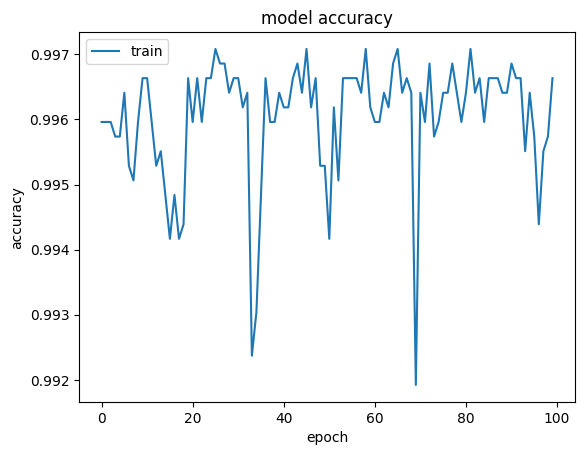

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


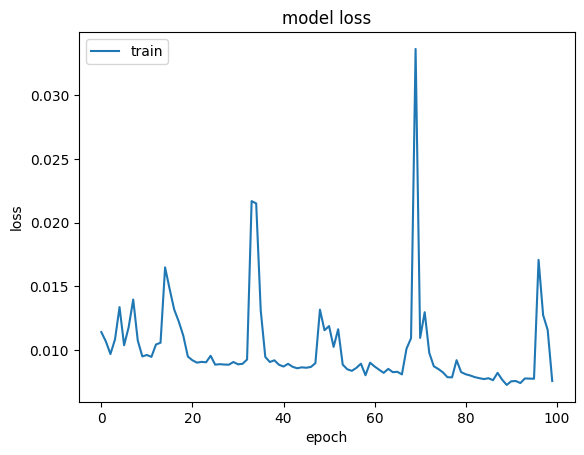

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
print(model.predict([
  "very good",
]))

1/1 [==============================] - 1s 910ms/step
[[3.059936e-13]]


In [ ]:
print(model.predict([
  "very bad",
]))

1/1 [==============================] - 0s 40ms/step
[[1.8438074e-13]]


In [ ]:
# First get the weights of the embedding layer
e = model.layers[1]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

(501, 8)


# Embedding Layer Projector
http://projector.tensorflow.org/

In [ ]:
# First get the weights of the embedding layer
e = model.layers[1]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

(501, 8)


In [ ]:
import io

# Write out the embedding vectors and metadata
out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, max_tokens):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [ ]:
# Download the files
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import numpy as np

In [ ]:
# read from file in tsv format
words = np.loadtxt('meta.tsv', skiprows=1, dtype=str)
words

array(['to', 'i', 'you', 'a', 'the', 'u', 'and', 'is', 'in', 'me', 'my',
       'for', 'your', 'it', 'of', 'call', 'have', 'on', 'that', 'are',
       '2', 'now', 'im', 'so', 'not', 'but', 'or', 'can', 'at', 'do',
       'ur', 'get', 'be', 'will', 'if', 'with', 'just', 'we', 'no',
       'this', 'its', 'up', '4', 'dont', 'when', 'go', 'ok', 'from',
       'ltgt', 'free', 'all', 'out', 'how', 'what', 'know', 'like', 'ill',
       'got', 'good', 'then', 'was', 'come', 'am', 'only', 'time', 'day',
       'love', 'there', 'want', 'send', 'text', 'he', 'as', 'by', 'one',
       'going', 'need', 'about', 'txt', 'home', 'lor', 'see', 'sorry',
       'still', 'r', 'stop', 'back', 'our', 'n', 'reply', 'today',
       'mobile', 'tell', 'new', 'well', 'later', 'hi', 'think', 'she',
       'da', 'been', 'any', 'please', 'take', 'they', 'phone', 'her',
       'cant', 'did', 'some', 'ü', 'here', 'has', 'week', 'night', 'an',
       'who', 'oh', 'much', 'hey', 'great', 'claim', 'him', 'dear', 'pls',


In [ ]:
# read vectors in tsv format
vectors = np.loadtxt('vecs.tsv', skiprows=1)
vectors

array([[ 0.0281662 , -0.19157125,  0.02138956, ..., -0.24801286,
        -0.04213734,  0.15953821],
       [ 0.55807626,  0.19134676,  0.5244475 , ...,  0.3713971 ,
         0.25851604, -0.22681294],
       [ 0.0971327 ,  0.18187094,  0.04575312, ...,  0.0926223 ,
         0.08865695, -0.18035549],
       ...,
       [ 0.19057155,  0.20505442,  0.18015979, ...,  0.14264701,
         0.19215867, -0.193661  ],
       [-0.4201502 ,  0.00496301, -0.45914805, ..., -0.23466964,
         0.39047506, -0.19156033],
       [ 0.0055308 ,  0.14612903,  0.00879085, ...,  0.12337141,
         0.25356564, -0.10914309]])

In [ ]:
# plotly scatter plot with metadata as labels
import plotly.express as px

fig = px.scatter(x=vectors[:,0], y=vectors[:,1], labels={'x':'x', 'y':'y'}, hover_name=words)
fig.show()

In [ ]:
model2 = Sequential()
model2.add(Input(shape=(1,), dtype="string"))
model2.add(vectorize_layer)
model2.add(Embedding(max_tokens + 1, 2))
model2.add(SimpleRNN(16, return_sequences=True))
model2.add(SimpleRNN(16))
model2.add(Dense(16, activation="relu"))
model2.add(Dense(1, activation="sigmoid"))
model2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization_3 (Text  (None, 5)                 0         
 Vectorization)                                                  
                                                                 
 embedding_4 (Embedding)     (None, 5, 2)              1002      
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 5, 16)             304       
                                                                 
 simple_rnn_4 (SimpleRNN)    (None, 16)                528       
                                                                 
 dense_8 (Dense)             (None, 16)                272       
                                                                 
 dense_9 (Dense)             (None, 1)                 17        
                                                      

In [ ]:
model2.compile(
  optimizer='adam',
  loss='binary_crossentropy',
  metrics=['accuracy'],
)

In [ ]:
history = model2.fit(X_train, y_train, epochs=200)


Epoch 1/200
140/140 [==============================] - 4s 5ms/step - loss: 0.3814 - accuracy: 0.8658
Epoch 2/200
140/140 [==============================] - 1s 5ms/step - loss: 0.1965 - accuracy: 0.9275
Epoch 3/200
140/140 [==============================] - 1s 5ms/step - loss: 0.1554 - accuracy: 0.9450
Epoch 4/200
140/140 [==============================] - 1s 8ms/step - loss: 0.1399 - accuracy: 0.9511
Epoch 5/200
140/140 [==============================] - 1s 9ms/step - loss: 0.1246 - accuracy: 0.9576
Epoch 6/200
140/140 [==============================] - 1s 9ms/step - loss: 0.1171 - accuracy: 0.9605
Epoch 7/200
140/140 [==============================] - 1s 5ms/step - loss: 0.1130 - accuracy: 0.9601
Epoch 8/200
140/140 [==============================] - 1s 5ms/step - loss: 0.1046 - accuracy: 0.9639
Epoch 9/200
140/140 [==============================] - 1s 5ms/step - loss: 0.0984 - accuracy: 0.9666
Epoch 10/200
140/140 [==============================] - 1s 5ms/step - loss: 0.0943 - accura

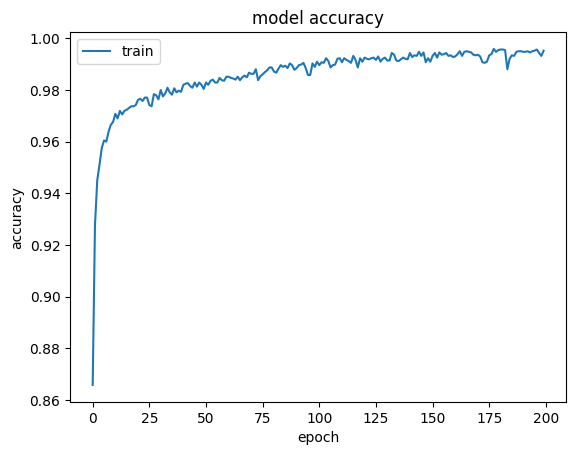

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
